In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
dados = pd.read_csv('/home/cassio/Documentos/Analise de Dados Python/Enem/2023/MICRODADOS_ENEM_2023.csv', sep=';',
                    encoding='iso-8859-1')

In [3]:
dados.shape

(3933955, 76)

In [ ]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4305108,Caxias do Sul,43,RS,1,1,1,1,1221.0,1193.0,1204.0,1211.0,502.0,498.9,475.6,363.2,DBEBDCECCBCEBBBBDBABDDBBAABCBACDBACECCBAADEBB,ABDEADAADCDABDCADAEABCDDCBAADCCBEBCEBEBDBEAED,ACEBDCABAACAEBAECEBBBAAECBBDEADCAECCCEDDABEED,CEAEACCCDABCDAACEDDBAAEBABDDEEBDAECABDBCBCADE,1,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.0,140.0,200.0,100.0,120.0,140.0,700.0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,1.0,0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,2304400,Fortaleza,23,CE,1,1,1,1,1224.0,1192.0,1202.0,1214.0,459.0,508.5,507.2,466.7,DEEBEACCCEBDDBDCCCAEEDCBAAADBCBEEEDCDAAECBEEC,DDAAEEBCCDEADBCDDCBAECABEBDEBDABECECEDCDDAEED,ADBDADAEEEACAABBACADCAEBBAAEBBCDEBBDDADDCADAA,EECBAEDEEDDDBBAADEECDBBBECEAACEAEECDBEDDBCDCB,0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.0,140.0,200.0,160.0,180.0,200.0,880.0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,1.0,0,2311306.0,Quixadá,23.0,CE,2.0,1.0,1.0,2311306,Quixadá,23,CE,1,1,1,1,1222.0,1191.0,1201.0,1212.0,402.5,379.2,446.9,338.3,AECCEAACDEABEEECDBAEEAAADDEABCBCEBACEEDCBEABD,CADEBCEDDEBCBAEBADDCECACADBDEBABDBDBEEDBBEADC,AABBACBCAEDABDADEDAACCAEEEECAACDCADBAEACDEAAE,CDBABEDCEEBBBDECDEBACCAABDEDCBECDECABBDBDEECC,0,CAAADCCCCDDDABDCACDBEEEDCEDAEECCDBEABDBABBAEB,CDAEECABAACEAADECBDAABCDCABADCDEABAABCDDEBADB,BBDABAAEBADACEEDCCDBADBDEDCCEBCACEACAACAACACBB...,DCECACCBDECBEEABEABDDAADDABBBCCBCCDDAEBDADEEB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [2]:
pd.options.display.max_columns = 76

In [5]:
dados1 = dados.copy()

In [6]:
# dropando nº inscrição e estado civil
dados1 = dados1.drop(columns=['NU_INSCRICAO', 'NU_ANO', 'TP_ESTADO_CIVIL'],)

In [7]:
# dropando alguns daddos pessoal
dados1 = dados1.drop(columns=['TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ENSINO'],)

In [8]:
# Dropando dados da escola
dados1 = dados1.drop(columns= ['CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'TP_SIT_FUNC_ESC'],)

In [9]:
# Dropando dados do local de prova
dados1 = dados1.drop(columns= ['CO_MUNICIPIO_PROVA', 'CO_UF_PROVA'],)

In [10]:
# Dropando dados da cor do caderno de questão
dados1 = dados1.drop(columns= ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT'],)

In [11]:
# Dropando as respostas dada pelos vestibulandos
dados1 = dados1.drop(columns= ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT'],)

In [12]:
# dropando os gabaritos
dados1 = dados1.drop(columns= ['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'],)

In [13]:
# dropando os dados do questionário socioeconômico
dados1 = dados1.drop(columns= ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010'])

In [15]:
dados1 = dados1.drop(columns= [ 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020'])

In [16]:
dados1 = dados1.drop(columns=[ 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'])

In [26]:
#dados1.to_csv('enem_2019_colunas_eliminadas.csv', encoding = 'iso-8859-1', index = False)

In [3]:
#dados = pd.read_csv('/home/cassio/Documentos/Analise de Dados Python/Enem/2023/enem_2019_colunas_eliminadas.csv', encoding = 'iso-8859-1')

In [4]:
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,14,M,1,17,1,0,NaN,NaN,NaN,NaN,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,M,1,16,1,0,NaN,NaN,NaN,NaN,Brasília,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,F,1,0,1,0,NaN,NaN,NaN,NaN,Caxias do Sul,RS,1,1,1,1,502.0,498.9,475.6,363.2,1,1.0,140.0,200.0,100.0,120.0,140.0,700.0
3,2,F,3,0,2,0,Fortaleza,CE,2.0,1.0,Fortaleza,CE,1,1,1,1,459.0,508.5,507.2,466.7,0,1.0,140.0,200.0,160.0,180.0,200.0,880.0
4,3,F,3,0,2,0,Quixadá,CE,2.0,1.0,Quixadá,CE,1,1,1,1,402.5,379.2,446.9,338.3,0,1.0,120.0,120.0,120.0,120.0,80.0,560.0


**Renomeando as colunas**

In [5]:
# Renomeando as colunas dos dados dos participantes
dados = dados.rename(columns={'TP_FAIXA_ETARIA': 'Idade', 'TP_SEXO': 'Sexo', 'TP_COR_RACA': 'Raca', 'TP_ANO_CONCLUIU': 'Ano_Concluiu', 'TP_ESCOLA': 'Escola', 'IN_TREINEIRO': 'Treineiro'})

In [6]:
# Renomeando as colunas dos dados da escola
dados = dados.rename(columns= {'NO_MUNICIPIO_ESC': 'Municipio', 'SG_UF_ESC': 'Estado', 'TP_DEPENDENCIA_ADM_ESC': 'Administracao', 'TP_LOCALIZACAO_ESC': 'Localizacao'})

In [7]:
# Renomeando as colunas dos dados do local de prova
dados = dados.rename(columns= {'NO_MUNICIPIO_PROVA': 'Local_prova', 'SG_UF_PROVA': 'Estado_aplicacao'})

In [8]:
# Renomeando as colunas dos dados da prova objetiva (presença)
dados = dados.rename(columns= {'TP_PRESENCA_CN': 'Presenca_CN', 'TP_PRESENCA_CH': 'Presenca_CH', 'TP_PRESENCA_LC': 'Presenca_LC', 
'TP_PRESENCA_MT': 'Presenca_MT'})

In [9]:
# Renomeando as colunas dos dados da prova objetiva (notas)

dados = dados.rename(columns= {'NU_NOTA_CN': 'Nota_CN', 'NU_NOTA_CH': 'Nota_CH', 'NU_NOTA_LC': 'Nota_LC', 'NU_NOTA_MT': 'Nota_MT',
'TP_LINGUA': 'Idioma'})

In [10]:
# Renomeando as colunas dos dados da redação
dados = dados.rename(columns= {'TP_STATUS_REDACAO': 'Redacao', 'NU_NOTA_COMP1': 'Comp1', 'NU_NOTA_COMP2': 'Comp2', 'NU_NOTA_COMP3': 'Comp3',
'NU_NOTA_COMP4': 'Comp4', 'NU_NOTA_COMP5': 'Comp5', 'NU_NOTA_REDACAO': 'Nota_Redacao'})

**Renomeando Registros**

In [11]:
dados['Idade'] = dados['Idade'].replace({1:'0-16', 2:'17', 3: '18', 4: '19', 5: '20', 6: '21', 7: '22', 8: '23', 9: '24', 10: '25', 
11:	'26-30', 12: '31-35', 13: '36-40', 14: '41-45', 15: '46-50', 16:'51-55', 17: '56-60', 18: '61-65', 19:'66-70', 20: '70+'})

In [12]:
dados['Raca']= dados['Raca'].replace({0:"nao_declarado", 1:"branca", 2:"preta", 3:"parda", 4:"amarela", 5:"indigena", 6: "indefinido"})

In [13]:
dados['Ano_Concluiu'] = dados['Ano_Concluiu'].replace({0:'Indefinido', 1:'2022', 2:'2021', 3: '2020', 4: '2019', 5: '2018', 6: '2017', 7: '2016', 8: '2015', 9: '2014', 10: '2013', 
11:	'2012', 12: '2011', 13: '2010', 14: '2009', 15: '2008', 16:'2007', 17: '-2007'})

In [14]:
dados['Escola'] = dados['Escola'].replace({1: 'Nao_declarado', 2: 'Publica', 3: 'Privada'})
dados['Treineiro']= dados['Treineiro'].replace({1: 'Sim', 0:'Nao'})
dados['Administracao'] = dados['Administracao'].replace({1: 'Federal', 2: 'Estadual', 3: ' Municipal', 4: 'Privada'})
dados['Localizacao']= dados['Localizacao'].replace({1: 'Urbana', 2:'Rural'})
dados['Idioma']= dados['Idioma'].replace({1: 'Espanhol', 0:'Ingles'})

In [15]:
dados['Redacao'] = dados['Redacao'].replace({1:'Sem problemas', 2: 'Anulada', 3: 'Cópia Texto Motivador', 4: 'Em Branco', 6:'Fuga ao tema', 7:'Não atendimento ao tipo textual', 8:'Texto insuficiente', 9: 'Parte desconectada'})

In [16]:
dados['Presenca_Total'] = dados['Presenca_CN'] + dados['Presenca_CH'] + dados['Presenca_LC'] + dados['Presenca_MT']

In [19]:
dados['Presenca_Total'].value_counts()

Presenca_Total
4    2682189
0    1093223
2     155659
6       2883
8          1
Name: count, dtype: int64

In [18]:
dados['Presenca_CH'] = dados['Presenca_CH'].replace({0: 'Faltou', 1: 'Presente', 2: 'Eliminado'})
dados['Presenca_MT'] = dados['Presenca_MT'].replace({0: 'Faltou', 1: 'Presente', 2: 'Eliminado'})
dados['Presenca_CN'] = dados['Presenca_CN'].replace({0: 'Faltou', 1: 'Presente', 2: 'Eliminado'})
dados['Presenca_LC'] = dados['Presenca_LC'].replace({0: 'Faltou', 1: 'Presente', 2: 'Eliminado'})

In [21]:
#dados.to_csv('enem_2023_formatada.csv', index=False)

# Arquivo Formatado

In [2]:
dados = pd.read_csv('/home/cassio/Documentos/Analise de Dados Python/Enem/2023/enem_2023_formatada.csv', encoding = 'iso-8859-1')

In [5]:
dados['Desistiu'] = dados['Presenca_Total']
dados['Desistiu'] = dados['Desistiu'].replace({0: 'Sim', 2: 'Inconclusivo', 4: 'Não', 6:'Eliminação', 8: 'Eliminação_Dupla'})
dados['Desistiu'].value_counts()

Desistiu
Não                 2682189
Sim                 1093223
Inconclusivo         155659
Eliminação             2883
Eliminação_Dupla          1
Name: count, dtype: int64

### Verificando os Dados

In [6]:
dados.isnull().sum()

Idade                     0
Sexo                      0
Raca                      0
Ano_Concluiu              0
Escola                    0
Treineiro                 0
Municipio           2975449
Estado              2975449
Administracao       2975449
Localizacao         2975449
Local_prova               0
Estado_aplicacao          0
Presenca_CN               0
Presenca_CH               0
Presenca_LC               0
Presenca_MT               0
Nota_CN             1241528
Nota_CH             1111312
Nota_LC             1111312
Nota_MT             1241528
Idioma                    0
Redacao             1111312
Comp1               1111312
Comp2               1111312
Comp3               1111312
Comp4               1111312
Comp5               1111312
Nota_Redacao        1111312
Presenca_Total            0
Desistiu                  0
dtype: int64

In [6]:
graf_dados = dados['Idade'].value_counts().sort_index()

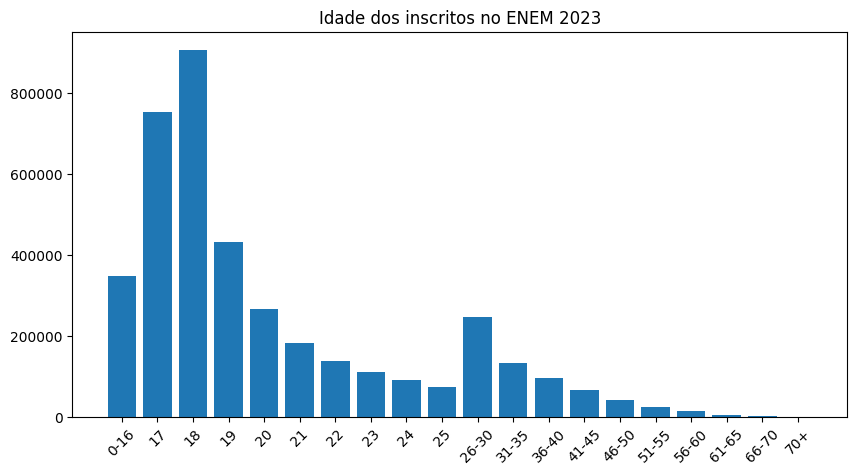

In [7]:
plt.figure(figsize= (10,5))
plt.title('Idade dos inscritos no ENEM 2023')
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=45)
plt.show()

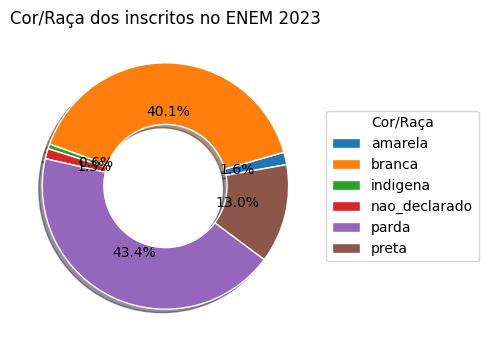

In [7]:
graf_dados = dados['Raca'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.title('Cor/Raça dos inscritos no ENEM 2023')
plt.pie(graf_dados,  shadow=True, startangle=10, autopct= '%1.1f%%',
        wedgeprops=dict(width=0.5, edgecolor='w'))
#plt.legend(graf_dados.index, position= 'right')
legenda = plt.legend(
    title="Cor/Raça",
    labels=graf_dados.index,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)


plt.show()

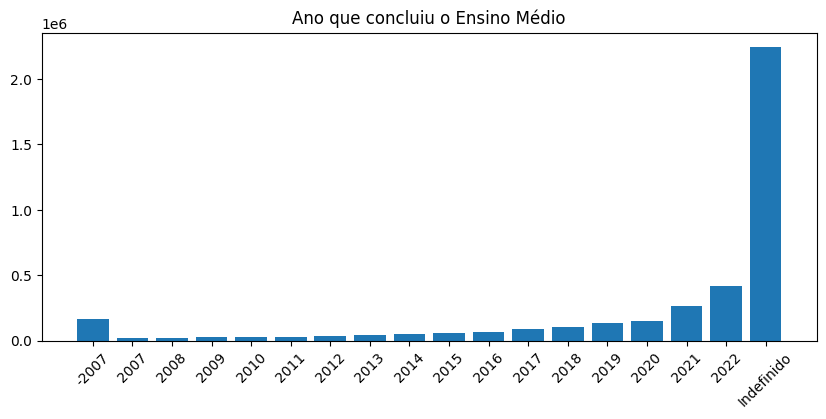

In [10]:
graf_dados = dados['Ano_Concluiu'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.title('Ano que concluiu o Ensino Médio')
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=45)
plt.show()

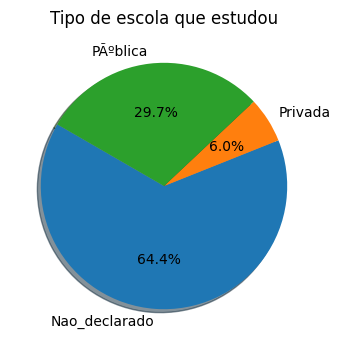

In [11]:
graf_dados = dados['Escola'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.title('Tipo de escola que estudou')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=150, autopct= '%1.1f%%')
plt.show()

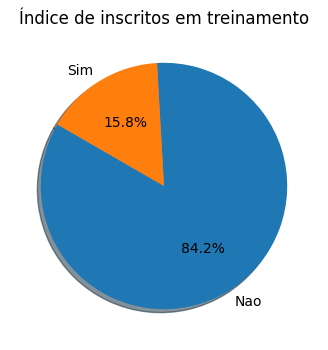

In [12]:
graf_dados = dados['Treineiro'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.title('Índice de inscritos em treinamento')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=150, autopct= '%1.1f%%')
plt.show()

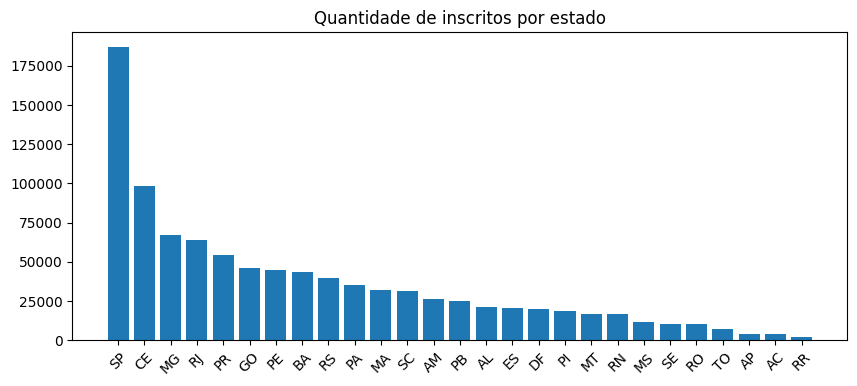

In [13]:
graf_dados = dados['Estado'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Quantidade de inscritos por estado')
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=45)
plt.show()

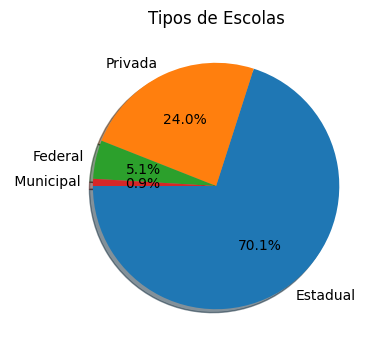

In [14]:
graf_dados = dados['Administracao'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Tipos de Escolas')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=180, autopct= '%1.1f%%')
plt.xticks(rotation=45)
plt.show()

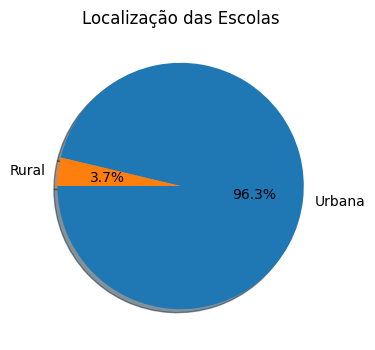

In [15]:
graf_dados = dados['Localizacao'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Localização das Escolas')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=180, autopct= '%1.1f%%')
plt.xticks(rotation=45)
plt.show()

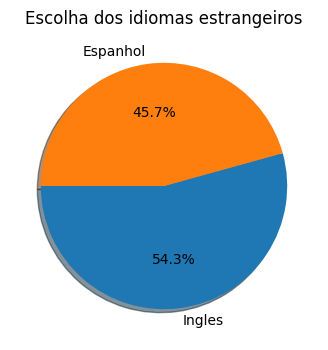

In [16]:
graf_dados = dados['Idioma'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Escolha dos idiomas estrangeiros')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=180, autopct= '%1.1f%%')
plt.xticks(rotation=45)
plt.show()

### Conhecendo os Desistentes

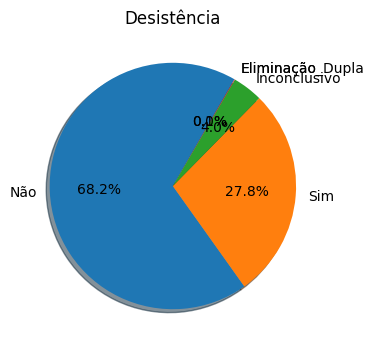

In [17]:
graf_dados = dados['Desistiu'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Desistência')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=1500, autopct= '%1.1f%%')
plt.xticks(rotation=45)
plt.show()

In [18]:
desistentes = dados.loc[dados['Presenca_Total'] == 0]
desistentes.shape[0]

1093223

In [19]:
#desistentes.to_csv('desistentes_enem_2023.csv', index=False)

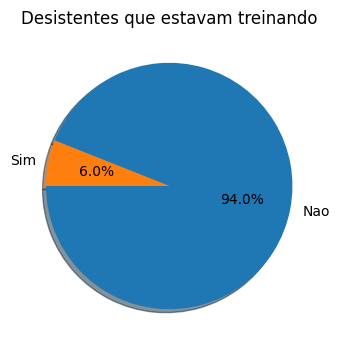

In [20]:
graf_dados= desistentes['Treineiro'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Desistentes que estavam treinando')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=180, autopct= '%1.1f%%')
plt.xticks(rotation=45)
plt.show()

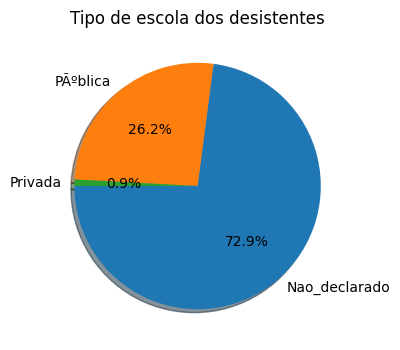

In [21]:
graf_dados= desistentes['Escola'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Tipo de escola dos desistentes')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=180, autopct= '%1.1f%%')
plt.xticks(rotation=45)
plt.show()

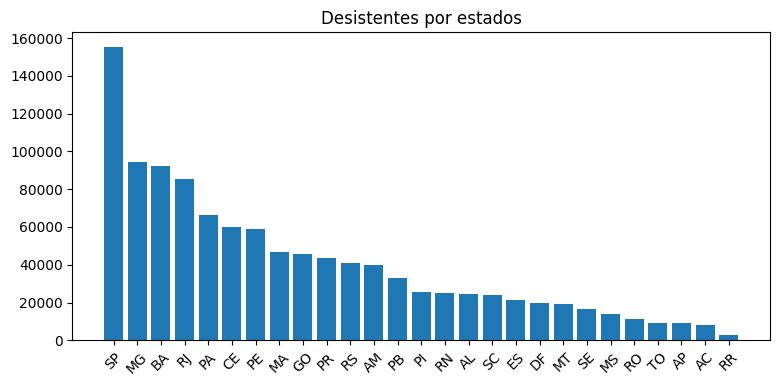

In [22]:
graf_dados = desistentes['Estado_aplicacao'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(9,4))
plt.title('Desistentes por estados')
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=45)
plt.show()

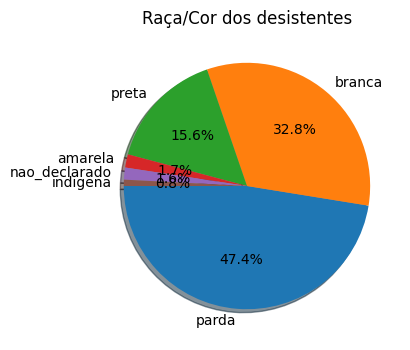

In [23]:
graf_dados= desistentes['Raca'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Raça/Cor dos desistentes')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=180, autopct= '%1.1f%%')
plt.xticks(rotation=45)
plt.show()

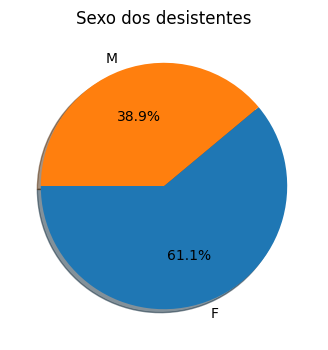

In [24]:
graf_dados= desistentes['Sexo'].value_counts()
plt.figure(figsize=(10,4))
plt.title('Sexo dos desistentes')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=180, autopct= '%1.1f%%')
plt.xticks(rotation=45)
plt.show()

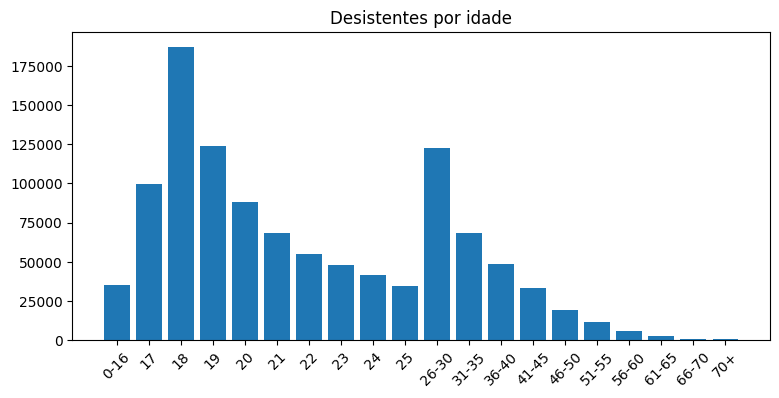

In [25]:
graf_dados = desistentes['Idade'].value_counts().sort_index()
plt.figure(figsize=(9,4))
plt.title('Desistentes por idade')
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=45)
plt.show()

**Presença**

In [8]:
estudantes = dados.loc[dados['Presenca_Total'] != 0]
treineiros = dados.loc[dados['Treineiro'] == 'Sim']
vestibulando = dados.loc[dados['Treineiro'] != 'Sim']

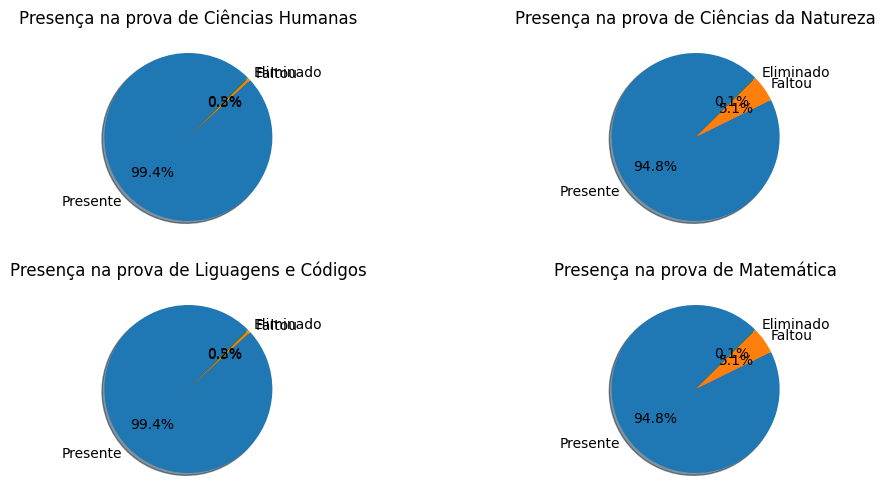

In [9]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
graf_dados = estudantes['Presenca_CH'].value_counts()
plt.title('Presença na prova de Ciências Humanas')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=45, autopct= '%1.1f%%')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
graf_dados = estudantes['Presenca_CN'].value_counts()
plt.title('Presença na prova de Ciências da Natureza')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=45, autopct= '%1.1f%%')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
graf_dados = estudantes['Presenca_LC'].value_counts()
plt.title('Presença na prova de Liguagens e Códigos')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=45, autopct= '%1.1f%%')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
graf_dados = estudantes['Presenca_MT'].value_counts()
plt.title('Presença na prova de Matemática')
plt.pie(graf_dados, labels= graf_dados.index, shadow=True, startangle=45, autopct= '%1.1f%%')
plt.xticks(rotation=45)

plt.show()

RESUMO DA PRESENÇA NAS PROVAS:

Ciências da Natureza: 2692427 presentes, 146093 faltaram e 2212 eliminados.

Ciências Humanas: 2822643 presentes, 13491 faltaram e 4598 eliminados.

Linguagens e Códigos: 2822643 presentes, 13491 faltaram e 4598 eliminados.

Matemática: 2692427 presentes, 146093 faltaram e 2212 eliminados.

**Redação**

In [10]:
vestibulando['Redacao'].value_counts().sort_values(ascending=False)

Redacao
Sem problemas                       2183487
Em Branco                             39203
Fuga ao tema                          21125
CÃ³pia Texto Motivador                18033
Texto insuficiente                     6928
Parte desconectada                     2120
NÃ£o atendimento ao tipo textual       1770
Anulada                                1728
Name: count, dtype: int64

In [11]:
provas = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Nota_Redacao']

In [12]:
vestibulando_presente = vestibulando.loc[vestibulando['Presenca_CH'] == 'Presente']
vestibulando_presente = vestibulando_presente.loc[vestibulando_presente['Presenca_MT'] == 'Presente']

**Valores ausente**

In [13]:
vestibulando_presente.isnull().sum()

Idade                     0
Sexo                      0
Raca                      0
Ano_Concluiu              0
Escola                    0
Treineiro                 0
Municipio           1445414
Estado              1445414
Administracao       1445414
Localizacao         1445414
Local_prova               0
Estado_aplicacao          0
Presenca_CN               0
Presenca_CH               0
Presenca_LC               0
Presenca_MT               0
Nota_CN                   0
Nota_CH                   0
Nota_LC                   0
Nota_MT                   0
Idioma                    0
Redacao                   0
Comp1                     0
Comp2                     0
Comp3                     0
Comp4                     0
Comp5                     0
Nota_Redacao              0
Presenca_Total            0
Desistiu                  0
dtype: int64

**Notas zeros**

In [14]:
from collections import Counter
dict(Counter(vestibulando_presente['Nota_Redacao']))

{700.0: 52714,
 880.0: 70721,
 560.0: 118790,
 600.0: 116573,
 860.0: 50057,
 780.0: 46326,
 800.0: 63370,
 480.0: 69900,
 540.0: 82322,
 820.0: 47720,
 620.0: 80564,
 920.0: 73748,
 520.0: 93316,
 940.0: 58402,
 720.0: 67936,
 400.0: 38722,
 580.0: 97164,
 460.0: 44716,
 500.0: 58642,
 640.0: 93640,
 840.0: 65139,
 680.0: 77336,
 420.0: 28939,
 0.0: 70869,
 360.0: 42200,
 960.0: 37922,
 980.0: 11352,
 740.0: 46799,
 900.0: 60079,
 380.0: 25538,
 760.0: 64121,
 300.0: 14109,
 280.0: 14993,
 240.0: 6011,
 440.0: 50796,
 340.0: 24612,
 220.0: 2205,
 660.0: 60896,
 320.0: 27113,
 260.0: 6754,
 100.0: 59,
 200.0: 1777,
 160.0: 522,
 140.0: 152,
 180.0: 658,
 1000.0: 57,
 40.0: 102,
 60.0: 84,
 120.0: 188,
 80.0: 118}

In [15]:
vestibulando_presente.query('Nota_Redacao == 0')['Nota_Redacao'].value_counts()

Nota_Redacao
0.0    70869
Name: count, dtype: int64

In [16]:
vestibulando_presente.query('Comp1 == 0')['Comp1'].value_counts()

Comp1
0.0    71047
Name: count, dtype: int64

In [17]:
vestibulando_presente.query('Comp2 == 0')['Comp2'].value_counts()

Comp2
0.0    70869
Name: count, dtype: int64

In [18]:
vestibulando_presente.query('Comp3 == 0')['Comp3'].value_counts()

Comp3
0.0    71252
Name: count, dtype: int64

In [19]:
vestibulando_presente.query('Comp4 == 0')['Comp4'].value_counts()

Comp4
0.0    71295
Name: count, dtype: int64

In [20]:
vestibulando_presente.query('Comp5 == 0')['Comp5'].value_counts()

Comp5
0.0    198327
Name: count, dtype: int64

NOTAS ZEROS EM REDAÇÃO:

REDAÇÃO (final): 70869 notas zeros devido a não cumprimento das regras ou tirou zero em todos os cinco componentes.

COMPONENTE 1(Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.): 71047 notas zeros somente neste item.

COMPONENTE 2 (Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa): 70869. 

COMPONENTE 3 (Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista): 71252 notas zeros somente neste item.

COMPONENTE 4 (Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.): 71295 notas zeros somente neste item.

COMPONENTE 5 (Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos): 198327 notas zeros somente neste item.

In [21]:
vestibulando_presente.query('Nota_CN == 0')['Nota_CN'].value_counts()

Nota_CN
0.0    12041
Name: count, dtype: int64

In [22]:
vestibulando_presente.query('Nota_CH == 0')['Nota_CH'].value_counts()

Nota_CH
0.0    2483
Name: count, dtype: int64

In [23]:
vestibulando_presente.query('Nota_LC == 0')['Nota_LC'].value_counts()

Nota_LC
0.0    628
Name: count, dtype: int64

In [24]:
vestibulando_presente.query('Nota_MT == 0')['Nota_MT'].value_counts()

Nota_MT
0.0    12162
Name: count, dtype: int64

NOTAS ZEROS DOS INSCRITOS CONCORRENTES AO ENEM:

Matemática = 12162

Ciências da Natureza = 12041

Linguagens e Códigos = 628

Ciências Humanas = 2483

Redação = 70869

In [25]:
vestibulando_presente = vestibulando_presente.drop(columns=['Treineiro', 'Estado', 'Presenca_CN', 'Presenca_CH', 'Presenca_LC', 
                                                            'Presenca_MT', 'Presenca_Total', 'Desistiu'],)

In [26]:
vestibulando_presente['Escola'] = vestibulando_presente['Escola'].replace({'PÃºblica': 'Publica'})

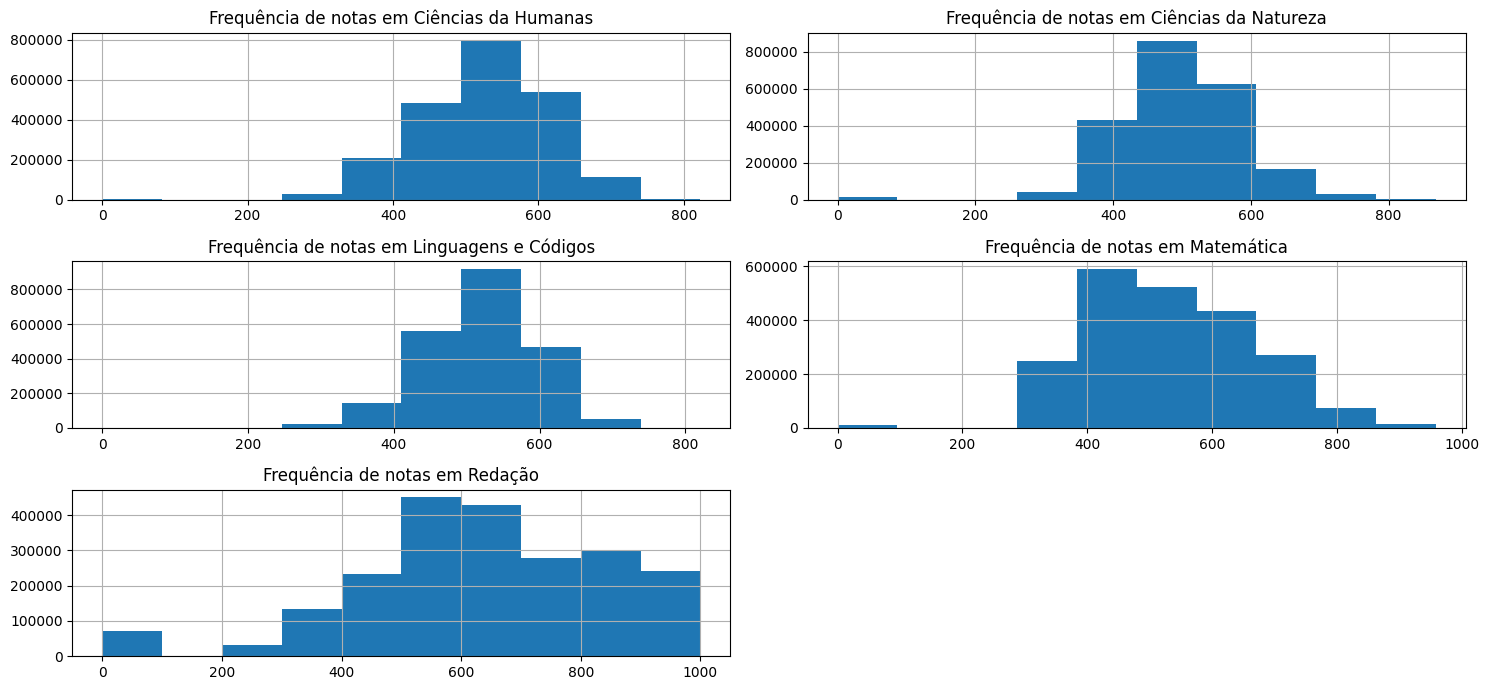

In [27]:
plt.figure(figsize=(15,7))

plt.subplot(3,2,1)
plt.title('Frequência de notas em Ciências da Humanas')
vestibulando_presente['Nota_CH'].hist()

plt.subplot(3,2,2)
plt.title('Frequência de notas em Ciências da Natureza')
vestibulando_presente['Nota_CN'].hist()

plt.subplot(3,2,3)
plt.title('Frequência de notas em Linguagens e Códigos')
vestibulando_presente['Nota_LC'].hist()

plt.subplot(3,2,4)
plt.title('Frequência de notas em Matemática')
vestibulando_presente['Nota_MT'].hist()

plt.subplot(3,2,5)
plt.title('Frequência de notas em Redação')
vestibulando_presente['Nota_Redacao'].hist()

plt.tight_layout()
plt.show()

In [28]:
vestibulando_presente.head()

,Idade,Sexo,Raca,Ano_Concluiu,Escola,Municipio,Administracao,Localizacao,Local_prova,Estado_aplicacao,...,Nota_LC,Nota_MT,Idioma,Redacao,Comp1,Comp2,Comp3,Comp4,Comp5,Nota_Redacao
2,21,F,branca,Indefinido,Nao_declarado,NaN,NaN,NaN,Caxias do Sul,RS,...,475.6,363.2,Espanhol,Sem problemas,140.0,200.0,100.0,120.0,140.0,700.0
3,17,F,parda,Indefinido,Publica,Fortaleza,Estadual,Urbana,Fortaleza,CE,...,507.2,466.7,Ingles,Sem problemas,140.0,200.0,160.0,180.0,200.0,880.0
4,18,F,parda,Indefinido,Publica,QuixadÃ¡,Estadual,Urbana,QuixadÃ¡,CE,...,446.9,338.3,Ingles,Sem problemas,120.0,120.0,120.0,120.0,80.0,560.0
9,26-30,M,branca,2015,Nao_declarado,NaN,NaN,NaN,Batatais,SP,...,610.4,680.2,Ingles,Sem problemas,120.0,120.0,120.0,120.0,120.0,600.0
10,23,M,parda,2018,Nao_declarado,NaN,NaN,NaN,Natal,RN,...,626.9,736.3,Ingles,Sem problemas,140.0,200.0,160.0,160.0,200.0,860.0


##### Agora entrarei no meu foco que é verificar a diferença entre notas do ensino público e particular

In [29]:
dados = vestibulando_presente[['Escola', 'Nota_CN', 'Nota_CH', 'Nota_LC', 'Nota_MT', 'Nota_Redacao']].groupby('Escola').mean()
dados

,Nota_CN,Nota_CH,Nota_LC,Nota_MT,Nota_Redacao
Escola,,,,,
Nao_declarado,504.015157,534.576280,525.743461,533.453747,621.669628
Privada,548.535323,575.068116,560.618591,630.865914,765.358292
Publica,473.690525,504.010498,502.724105,504.270323,594.249973


In [30]:
escola_privada = vestibulando_presente.loc[vestibulando_presente['Escola'] == 'Privada']
escola_privada.head()

,Idade,Sexo,Raca,Ano_Concluiu,Escola,Municipio,Administracao,Localizacao,Local_prova,Estado_aplicacao,...,Nota_LC,Nota_MT,Idioma,Redacao,Comp1,Comp2,Comp3,Comp4,Comp5,Nota_Redacao
122,18,F,parda,Indefinido,Privada,Manaus,Privada,Urbana,Manaus,AM,...,597.7,663.3,Espanhol,Sem problemas,140.0,120.0,120.0,140.0,180.0,700.0
186,18,F,parda,Indefinido,Privada,SantarÃ©m,Privada,Urbana,SantarÃ©m,PA,...,602.2,612.2,Espanhol,Sem problemas,140.0,200.0,160.0,180.0,200.0,880.0
474,18,F,indigena,Indefinido,Privada,Batatais,Privada,Urbana,Batatais,SP,...,519.4,591.0,Espanhol,Sem problemas,140.0,180.0,120.0,160.0,140.0,740.0
544,17,F,parda,Indefinido,Privada,NaN,NaN,NaN,Osasco,SP,...,492.5,514.0,Ingles,Sem problemas,120.0,160.0,140.0,100.0,100.0,620.0
652,18,F,preta,Indefinido,Privada,Rio de Janeiro,Privada,Urbana,Rio de Janeiro,RJ,...,415.0,491.5,Ingles,Sem problemas,140.0,180.0,140.0,160.0,120.0,740.0


In [31]:
escola_publica = vestibulando_presente.loc[vestibulando_presente['Escola'] == 'Publica']
escola_publica.head()

,Idade,Sexo,Raca,Ano_Concluiu,Escola,Municipio,Administracao,Localizacao,Local_prova,Estado_aplicacao,...,Nota_LC,Nota_MT,Idioma,Redacao,Comp1,Comp2,Comp3,Comp4,Comp5,Nota_Redacao
3,17,F,parda,Indefinido,Publica,Fortaleza,Estadual,Urbana,Fortaleza,CE,...,507.2,466.7,Ingles,Sem problemas,140.0,200.0,160.0,180.0,200.0,880.0
4,18,F,parda,Indefinido,Publica,QuixadÃ¡,Estadual,Urbana,QuixadÃ¡,CE,...,446.9,338.3,Ingles,Sem problemas,120.0,120.0,120.0,120.0,80.0,560.0
11,18,M,parda,Indefinido,Publica,UbiratÃ£,Estadual,Urbana,UbiratÃ£,PR,...,607.9,691.9,Ingles,Sem problemas,140.0,180.0,120.0,160.0,180.0,780.0
16,19,F,branca,Indefinido,Publica,BelÃ©m,Estadual,Urbana,BelÃ©m,PA,...,544.4,437.0,Ingles,Sem problemas,160.0,180.0,160.0,180.0,200.0,880.0
41,18,M,branca,Indefinido,Publica,SÃ£o Paulo,Estadual,Urbana,SÃ£o Paulo,SP,...,596.5,628.1,Ingles,Sem problemas,120.0,140.0,100.0,120.0,120.0,600.0


Temos que existem 221328 pessoas que estudaram na escola privada enquanto 829530 são da escola pública.

De modo que a escola pública possui aproximadamente 3,748 vezes mais alunos que a escola privada

Verificaremos as notas agora

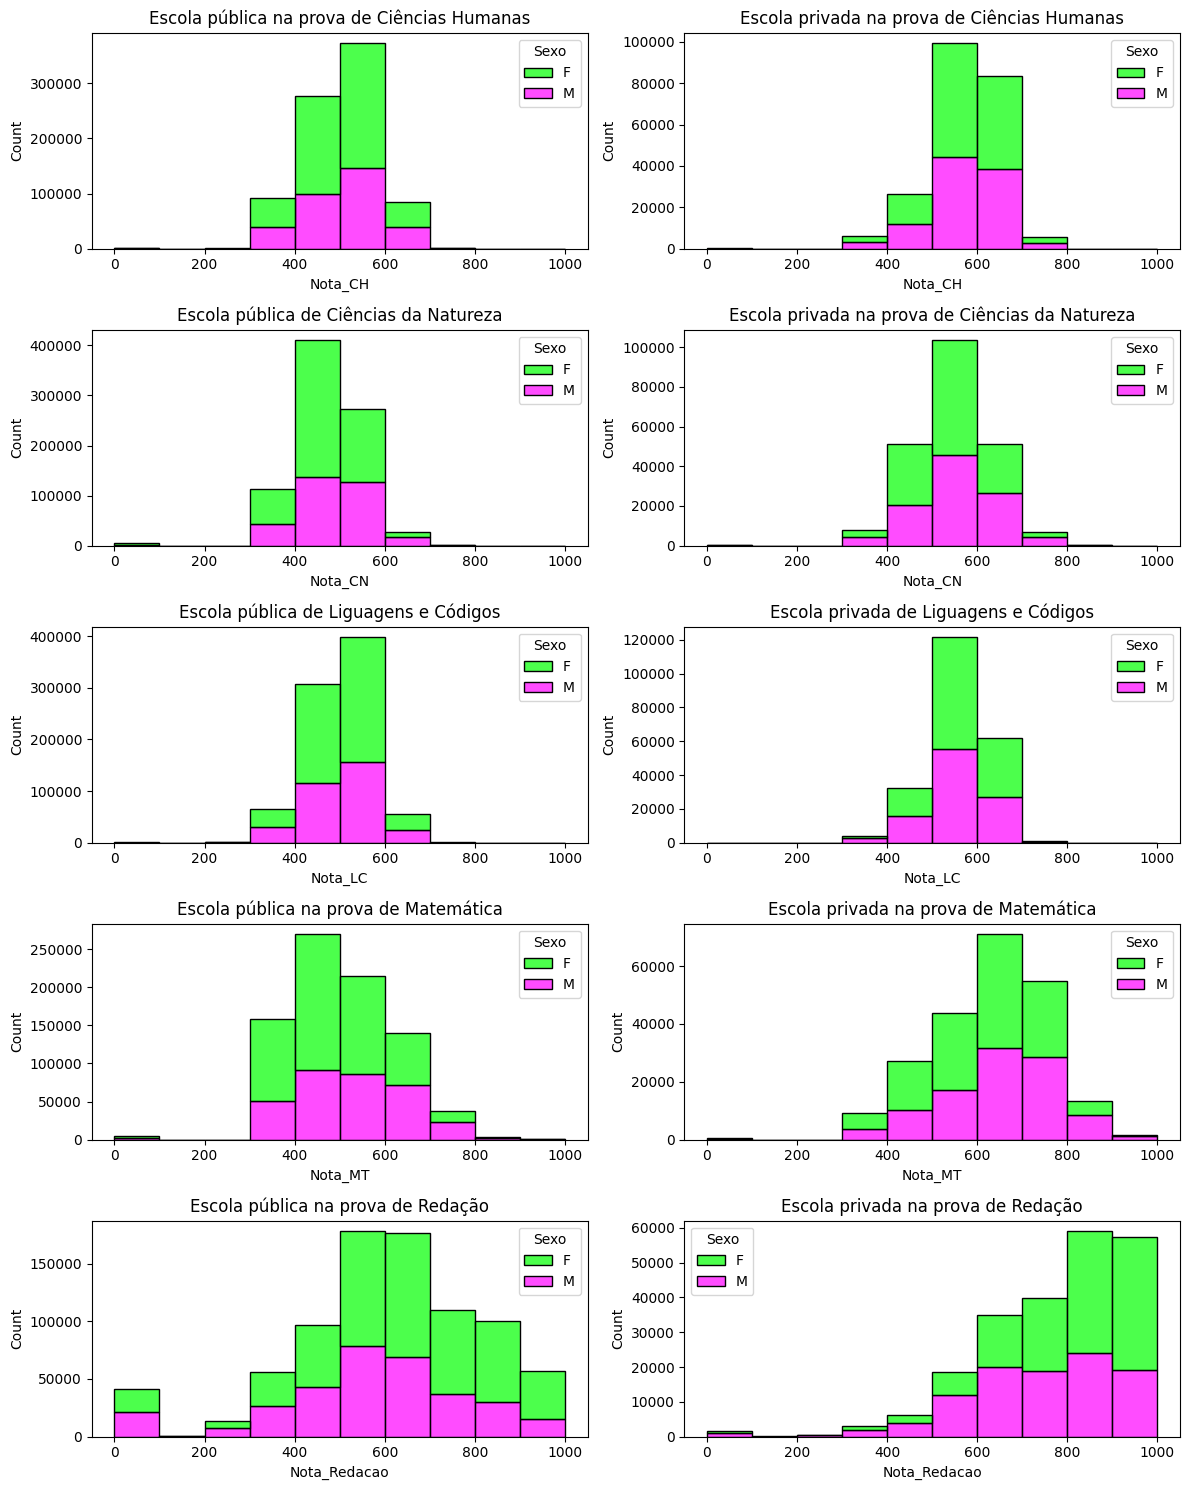

In [32]:
plt.figure(figsize=(12,15))

plt.subplot(5,2,1)

plt.title('Escola pública na prova de Ciências Humanas')
sns.histplot(data=escola_publica, x= 'Nota_CH', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")


plt.subplot(5,2,2)
plt.title('Escola privada na prova de Ciências Humanas')
sns.histplot(data=escola_privada, x= 'Nota_CH', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.subplot(5,2,3)
plt.title('Escola pública de Ciências da Natureza')
sns.histplot(data=escola_publica, x= 'Nota_CN', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.subplot(5,2,4)
plt.title('Escola privada na prova de Ciências da Natureza')
sns.histplot(data=escola_privada, x= 'Nota_CN', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.subplot(5,2,5)
plt.title('Escola pública de Liguagens e Códigos')
sns.histplot(data=escola_publica, x= 'Nota_LC', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.subplot(5,2,6)
plt.title('Escola privada de Liguagens e Códigos')
sns.histplot(data=escola_privada, x= 'Nota_LC', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.subplot(5,2,7)
plt.title('Escola pública na prova de Matemática')
sns.histplot(data=escola_publica, x= 'Nota_MT', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.subplot(5,2,8)
plt.title('Escola privada na prova de Matemática')
sns.histplot(data=escola_privada, x= 'Nota_MT', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.subplot(5,2,9)
plt.title('Escola pública na prova de Redação')
sns.histplot(data=escola_publica, x= 'Nota_Redacao', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.subplot(5,2,10)
plt.title('Escola privada na prova de Redação')
sns.histplot(data=escola_privada, x= 'Nota_Redacao', hue= 'Sexo', 
             bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="stack")

plt.tight_layout()
plt.show()

##### Percebe-se que o índice das notas de pessoas do sexo Feminino é maior que o Masculino

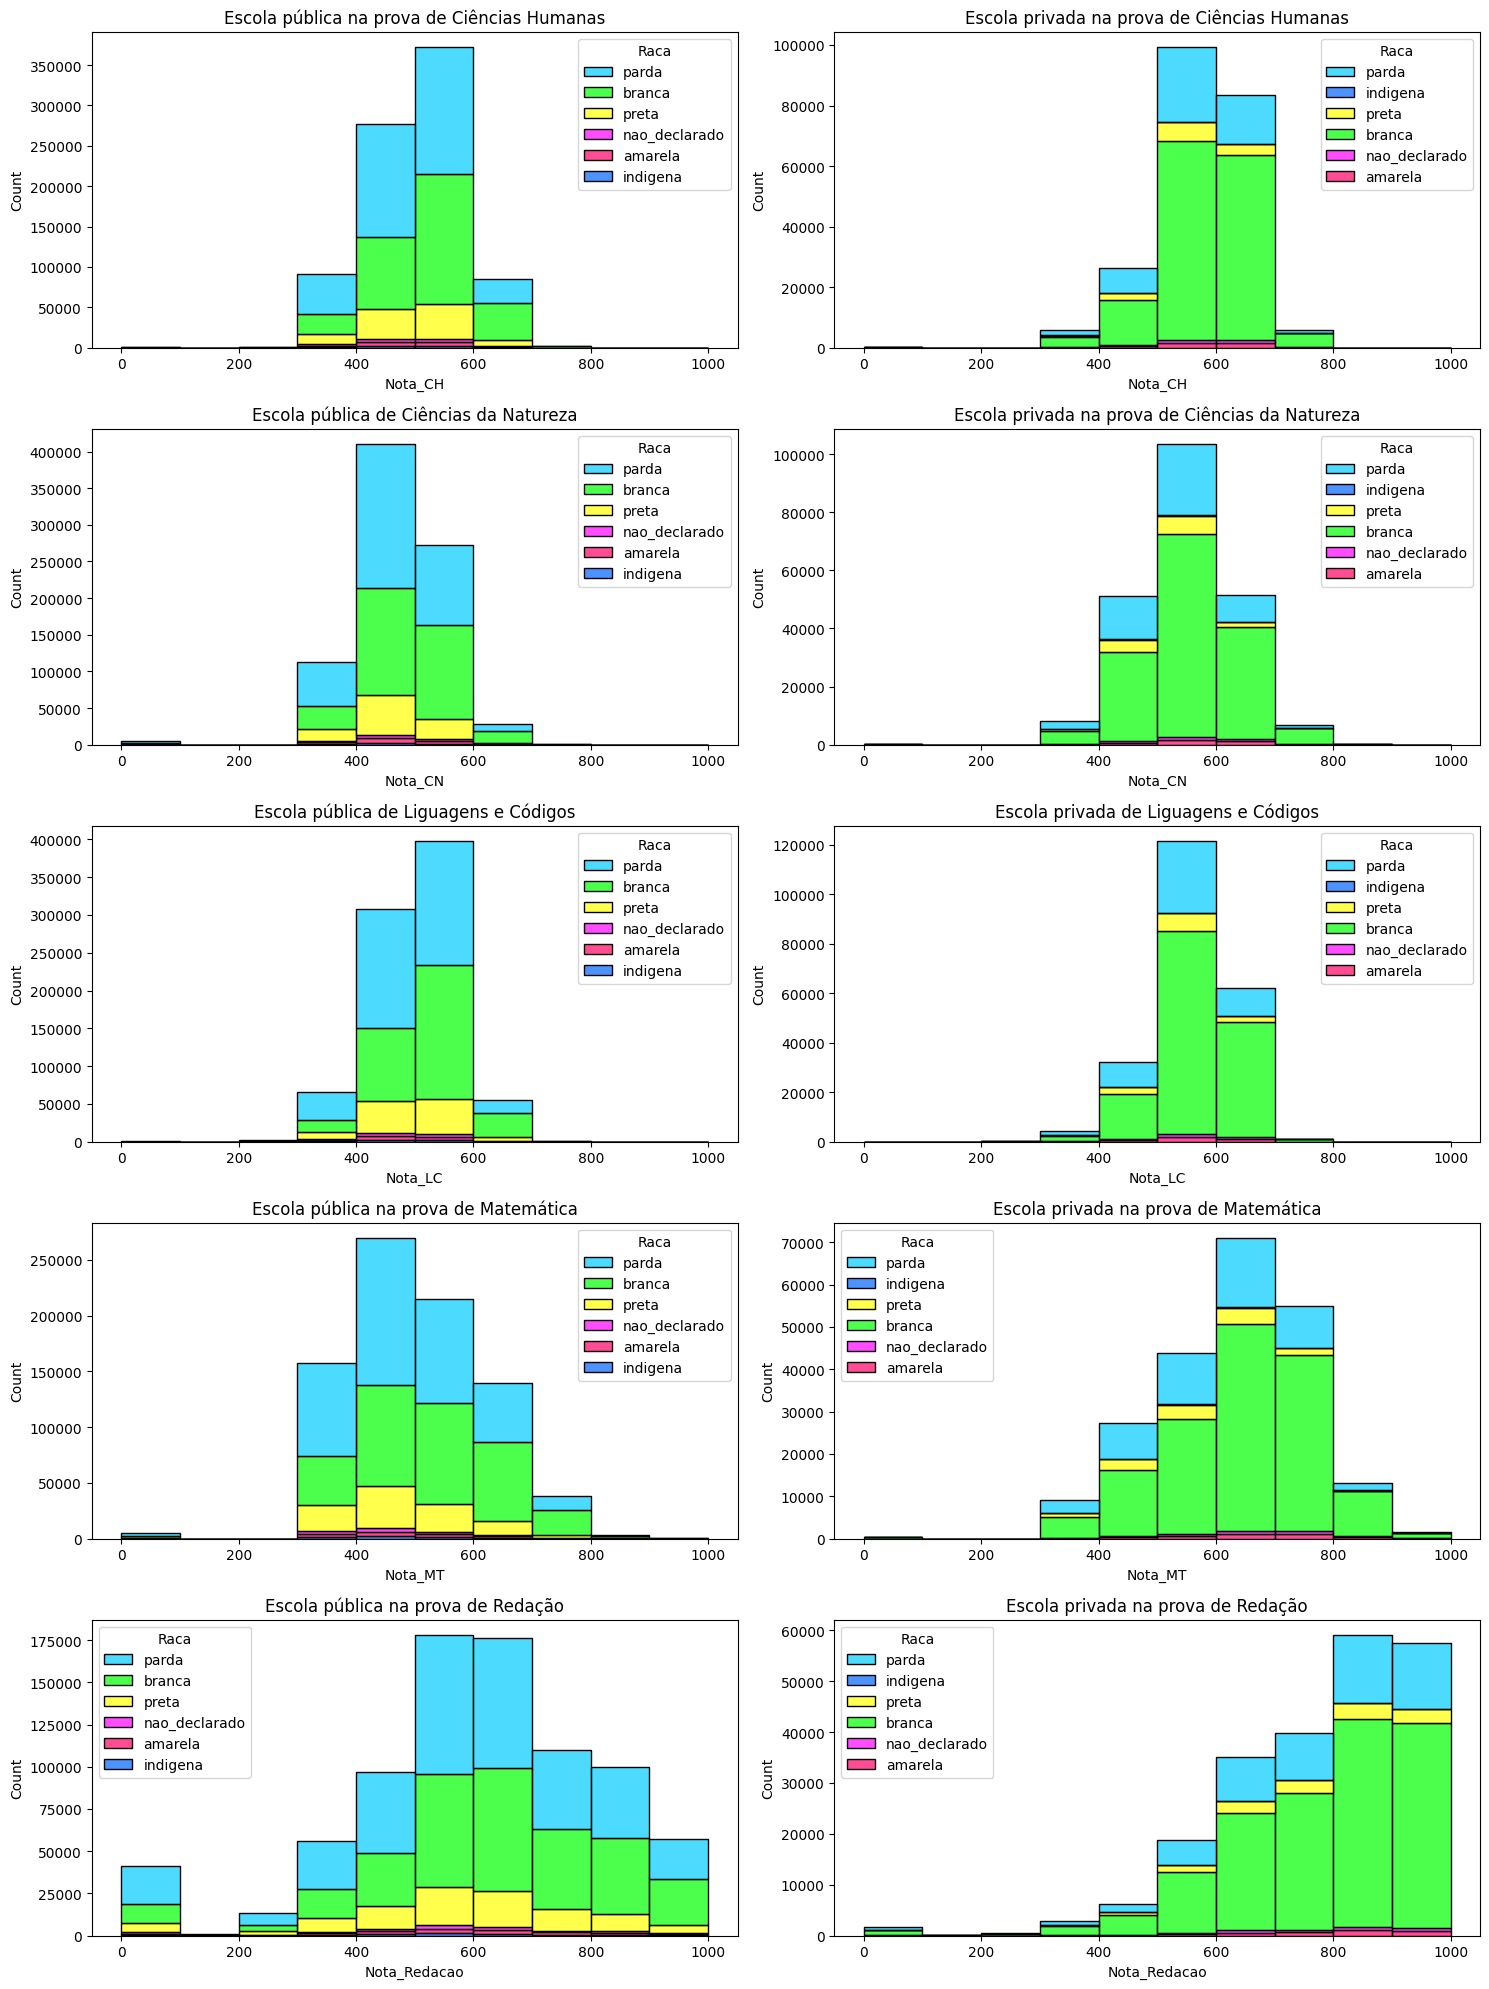

In [33]:
plt.figure(figsize=(15,20))

plt.subplot(5,2,1)

plt.title('Escola pública na prova de Ciências Humanas')
sns.histplot(data=escola_publica, x= 'Nota_CH', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#00ff00', "#ffff00", "#ff00ff", '#ff0066', '#0066ff'], alpha= 0.7, multiple="stack")


plt.subplot(5,2,2)
plt.title('Escola privada na prova de Ciências Humanas')
sns.histplot(data=escola_privada, x= 'Nota_CH', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#0066ff', "#ffff00", '#00ff00', "#ff00ff", '#ff0066'], alpha= 0.7, multiple="stack")

plt.subplot(5,2,3)
plt.title('Escola pública de Ciências da Natureza')
sns.histplot(data=escola_publica, x= 'Nota_CN', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#00ff00', "#ffff00", "#ff00ff", '#ff0066', '#0066ff'], alpha= 0.7, multiple="stack")

plt.subplot(5,2,4)
plt.title('Escola privada na prova de Ciências da Natureza')
sns.histplot(data=escola_privada, x= 'Nota_CN', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#0066ff', "#ffff00", '#00ff00', "#ff00ff", '#ff0066'], alpha= 0.7, multiple="stack")

plt.subplot(5,2,5)
plt.title('Escola pública de Liguagens e Códigos')
sns.histplot(data=escola_publica, x= 'Nota_LC', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#00ff00', "#ffff00", "#ff00ff", '#ff0066', '#0066ff'], alpha= 0.7, multiple="stack")

plt.subplot(5,2,6)
plt.title('Escola privada de Liguagens e Códigos')
sns.histplot(data=escola_privada, x= 'Nota_LC', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#0066ff', "#ffff00", '#00ff00', "#ff00ff", '#ff0066'], alpha= 0.7, multiple="stack")

plt.subplot(5,2,7)
plt.title('Escola pública na prova de Matemática')
sns.histplot(data=escola_publica, x= 'Nota_MT', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#00ff00', "#ffff00", "#ff00ff", '#ff0066', '#0066ff'], alpha= 0.7, multiple="stack")

plt.subplot(5,2,8)
plt.title('Escola privada na prova de Matemática')
sns.histplot(data=escola_privada, x= 'Nota_MT', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#0066ff', "#ffff00", '#00ff00', "#ff00ff", '#ff0066'], alpha= 0.7, multiple="stack")

plt.subplot(5,2,9)
plt.title('Escola pública na prova de Redação')
sns.histplot(data=escola_publica, x= 'Nota_Redacao', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#00ff00', "#ffff00", "#ff00ff", '#ff0066', '#0066ff'], alpha= 0.7, multiple="stack")

plt.subplot(5,2,10)
plt.title('Escola privada na prova de Redação')
sns.histplot(data=escola_privada, x= 'Nota_Redacao', hue= 'Raca', bins=[0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
             palette=['#00ccff', '#0066ff', "#ffff00", '#00ff00', "#ff00ff", '#ff0066'], alpha= 0.7, multiple="stack")

plt.tight_layout()
plt.show()

Percebe-se que o índice das notas de pessoas do Brancas no ensino privado é muito superior do que qualquer outra raça.
Mas na rede pública o índice de pessoas Brancas e Pardas é muito próximo.
Se unirmos as pessoas Pardas e Pretas temos que o índice supera nas escolas Públicas, mas na superior as pessoas Brancas ainda são superiores.

In [34]:
escola_privada.drop(columns=['Idade', 'Sexo', 'Raca', 'Idioma', 'Ano_Concluiu', 'Municipio', 'Escola', 'Administracao','Localizacao', 'Local_prova', 'Estado_aplicacao', 'Redacao', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5'], inplace=True)
escola_publica.drop(columns=['Idade', 'Sexo', 'Raca', 'Idioma', 'Ano_Concluiu', 'Municipio', 'Escola', 'Administracao','Localizacao', 'Local_prova', 'Estado_aplicacao', 'Redacao', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5'], inplace=True)

/tmp/ipykernel_246510/3994726183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escola_privada.drop(columns=['Idade', 'Sexo', 'Raca', 'Idioma', 'Ano_Concluiu', 'Municipio', 'Escola', 'Administracao','Localizacao', 'Local_prova', 'Estado_aplicacao', 'Redacao', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5'], inplace=True)
/tmp/ipykernel_246510/3994726183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escola_publica.drop(columns=['Idade', 'Sexo', 'Raca', 'Idioma', 'Ano_Concluiu', 'Municipio', 'Escola', 'Administracao','Localizacao', 'Local_prova', 'Estado_aplicacao', 'Redacao', 'Comp1', 'Comp2', 'Comp3', 'Comp4', 

In [35]:
ttest_results = {}
subjects = ['Nota_CN', 'Nota_CH', 'Nota_LC', 'Nota_MT', 'Nota_Redacao']

for subject in subjects:
    ttest_results[subject] = stats.ttest_ind(escola_publica[subject].dropna(), escola_privada[subject].dropna())

# Exibir resultados
for subject, result in ttest_results.items():
    print(f"T-Test for {subject}:")
    print(f"Statistic: {result.statistic}, p-value: {result.pvalue}\n")

T-Test for Nota_CN:
Statistic: -396.10844789753776, p-value: 0.0

T-Test for Nota_CH:
Statistic: -371.78034480058255, p-value: 0.0

T-Test for Nota_LC:
Statistic: -348.3749919652199, p-value: 0.0

T-Test for Nota_MT:
Statistic: -448.8211467619956, p-value: 0.0

T-Test for Nota_Redacao:
Statistic: -351.9256607666826, p-value: 0.0



Descobriu-se que a diferença entre as médias das notas do ENEM entre as escolas públicas e privadas é significativo.

Tendo uma diferença mínima de 348.37 na área de Linguagens e Códigos a favor das escolas privadas.

Como eu já trabalhei como professor da rede estadual sei que para melhorar as médias das notas das escolas públicas é necessário ter uma reformulação no ensino fundamental e médio. 

## Comparar o desempenho por gênero

In [ ]:
# Média das notas por tipos de gênero

vestibulando_presente[['Sexo', 'Nota_CN', 'Nota_CH', 'Nota_LC', 'Nota_MT', 'Nota_Redacao']].groupby(['Sexo']).mean()

,Nota_CN,Nota_CH,Nota_LC,Nota_MT,Nota_Redacao
Sexo,,,,,
F,488.697101,523.163019,519.065899,514.963937,643.167063
M,509.614425,532.911263,522.682050,558.710997,599.292981


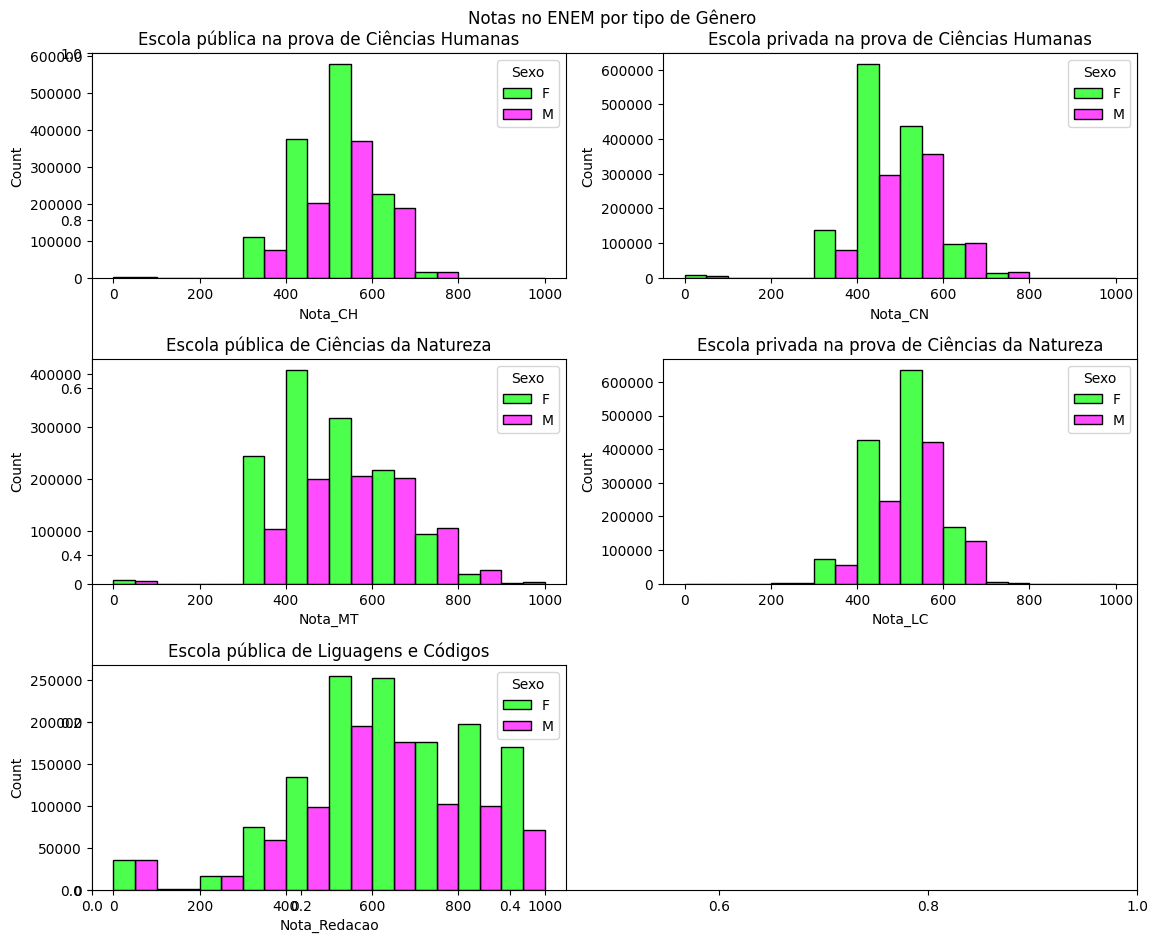

In [ ]:
plt.figure(figsize=(12,10))

plt.title("Notas no ENEM por tipo de Gênero \n")

plt.subplot(3,2,1)

plt.title('Escola pública na prova de Ciências Humanas')
sns.histplot(data=vestibulando_presente, x= 'Nota_CH', hue= 'Sexo', 
             bins= bins, palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="dodge")


plt.subplot(3,2,2)
plt.title('Escola privada na prova de Ciências Humanas')
sns.histplot(data=vestibulando_presente, x= 'Nota_CN', hue= 'Sexo', 
             bins=bins, palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="dodge")

plt.subplot(3,2,3)
plt.title('Escola pública de Ciências da Natureza')
sns.histplot(data=vestibulando_presente, x= 'Nota_MT', hue= 'Sexo', 
             bins=bins, palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="dodge")

plt.subplot(3,2,4)
plt.title('Escola privada na prova de Ciências da Natureza')
sns.histplot(data=vestibulando_presente, x= 'Nota_LC', hue= 'Sexo', 
             bins=bins, palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="dodge")

plt.subplot(3,2,5)
plt.title('Escola pública de Liguagens e Códigos')
sns.histplot(data=vestibulando_presente, x= 'Nota_Redacao', hue= 'Sexo', 
             bins=bins, palette=["#00ff00", "#ff00ff"], alpha= 0.7, multiple="dodge")



plt.tight_layout()
plt.show()

In [ ]:
feminino = vestibulando_presente.loc[vestibulando_presente['Sexo'] == 'F']
masculino = vestibulando_presente.loc[vestibulando_presente['Sexo'] == 'M']

In [ ]:
ttest_results = {}
subjects = ['Nota_CN', 'Nota_CH', 'Nota_LC', 'Nota_MT', 'Nota_Redacao']

for subject in subjects:
    ttest_results[subject] = stats.ttest_ind(feminino[subject].dropna(), masculino[subject].dropna())

# Exibir resultados
for subject, result in ttest_results.items():
    print(f"T-Test for {subject}:")
    print(f"Statistic: {result.statistic}, p-value: {result.pvalue}\n")

T-Test for Nota_CN:
Statistic: -171.53218904551863, p-value: 0.0

T-Test for Nota_CH:
Statistic: -79.78222774906618, p-value: 0.0

T-Test for Nota_LC:
Statistic: -34.67358257982399, p-value: 2.329368504396318e-263

T-Test for Nota_MT:
Statistic: -241.36532187275748, p-value: 0.0

T-Test for Nota_Redacao:
Statistic: 151.9462520699308, p-value: 0.0

